In [2]:
import src.data_prep as dp
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF

%config InlineBackend.figure_format = 'retina'

In [3]:
plt.style.use("cyberpunk")
# plt.style.use('fivethirtyeight')
# plt.style.use('dark_background')
# plt.style.use('seaborn-bright')

In [4]:
reports = dp.import_data("data/data.json")
df = dp.create_df(reports)
df = df.reset_index()
df = df.rename(columns={"index": "id"})
df.head()

,id,YEAR,SEASON,MONTH,STATE,COUNTY,LOCATION DETAILS,NEAREST TOWN,NEAREST ROAD,OBSERVED,ALSO NOTICED,OTHER WITNESSES,OTHER STORIES,TIME AND CONDITIONS,ENVIRONMENT,DATE
0,60,1994-1997+,Spring,NaN,Washington,Skagit County,"Up the Baker hwy., about 12 miles north from H...",Concrete,Mt.Baker Hwy,"These two gentlmen, brothers, recluses age 50'...",Feces was found and sent to a University in Mo...,NaN,There is a ridge along their property-Doc Butt...,These events occured from May all thru June an...,200 acres of interspersed Old growth Douglas Fir.,intermittant
1,70,2000,Summer,July,New York,Washington County,1/2 mile into the trail to Buck Mountain,Queensbury,Shelving Rock Road,My wife and I were off the trail to take some ...,NaN,My wife,The local Police chased a Bigfoot into the woo...,"2 pm , partly cloudy with light rain",Next to a creek 300 feet off the trail to Buck...,9
2,76,1997,Summer,June,Arkansas,Baxter County,THE LOCATION WAS IN THE GOVERNMENT TRACK LAND ...,Mt. Home,101 bridge,I DID NOT SEE ANYTHING. I DID HEAR A LOT. WH...,LOUD SHRILL,THRE TOTAL/FISHING,NO.,THIS INCIDENT DID TAKE PLACE ON THE EARLY MORN...,THE AREA IS A DENSE FOREST WHICH SURROUNDS A V...,25-27approx
3,77,1983,Fall,September,Washington,Kittitas County,"I haven't been there in years, but an area map...",Yakima,Chinook pass hyway 410,"We had driven into Milk pond, up Chinook pass,...","we thought it was weird the frogs stopped, usa...","my husband, Glenn. we had a tape recorded, bu...",NaN,NaN,"pine forest, you have to drive up to get to th...",?
4,80,1983,Summer,August,Oregon,Lane County,"It was at Kitson Springs, near the Willamette ...","Bend, Oregon",State Hwy 58,"My veterinarian sister, former girlfriend, and...",NaN,3 persons total. We were tring to get some sl...,On another occaison I had found and photograhe...,"1:00AM dark, warm evening. clear sky.","Forest, mountains and streams",12


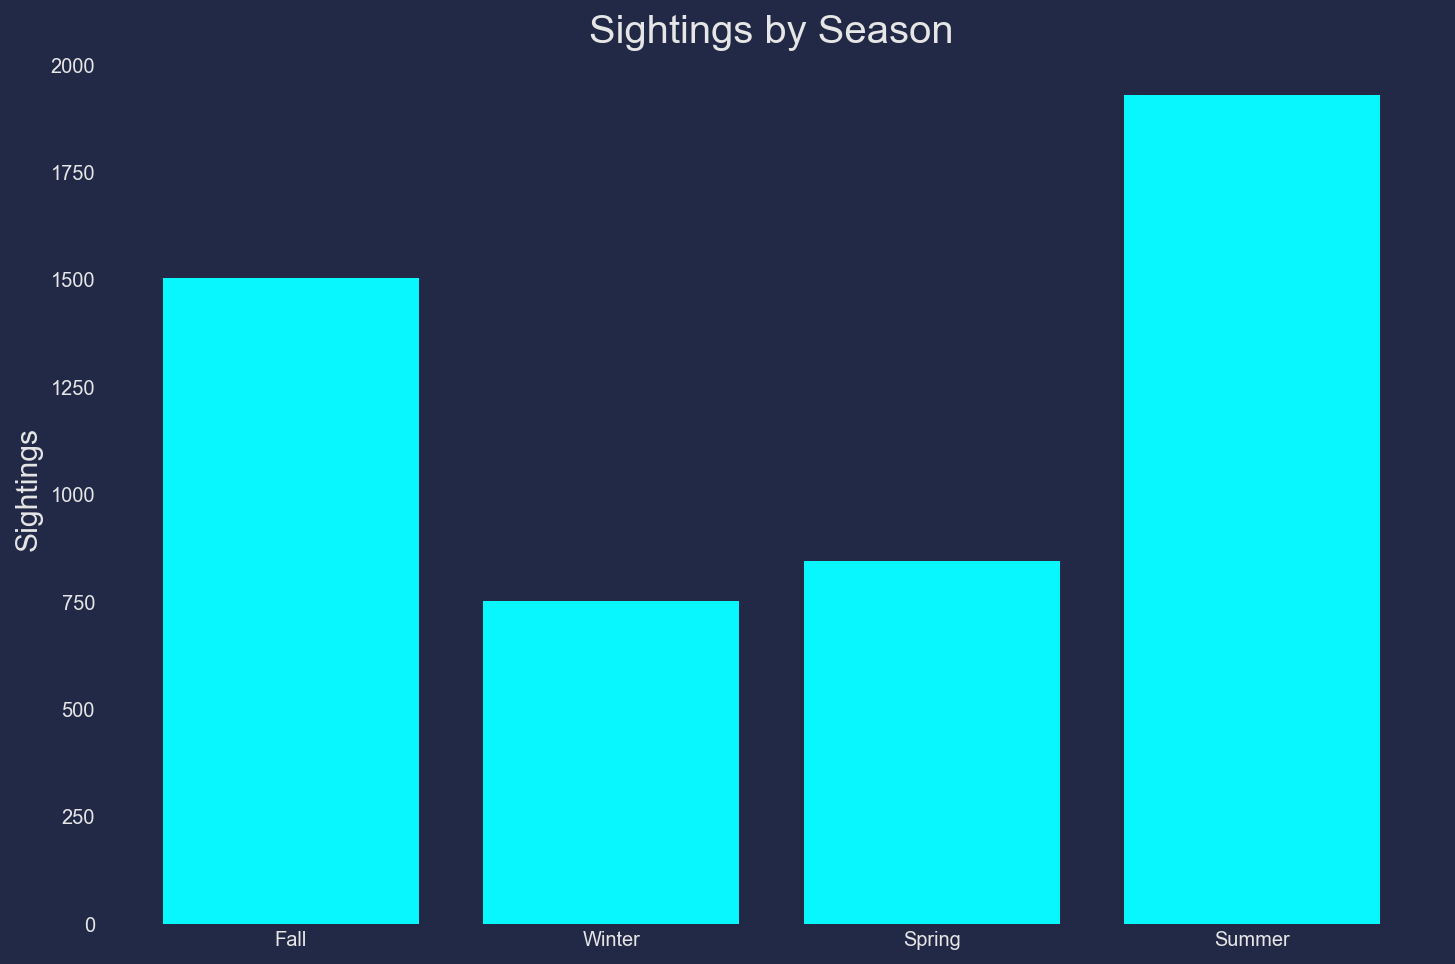

In [16]:
seasons = df.groupby('SEASON').count()['id']

fig, ax = plt.subplots(figsize=(12,8))
s = ['Fall','Winter','Spring','Summer']
ax.bar(s, seasons[s])
ax.set_title('Sightings by Season', fontsize=20)
ax.set_ylabel('Sightings', fontsize=15)
ax.grid(False)
plt.savefig('images/sightings_by_season1.png')
plt.show()

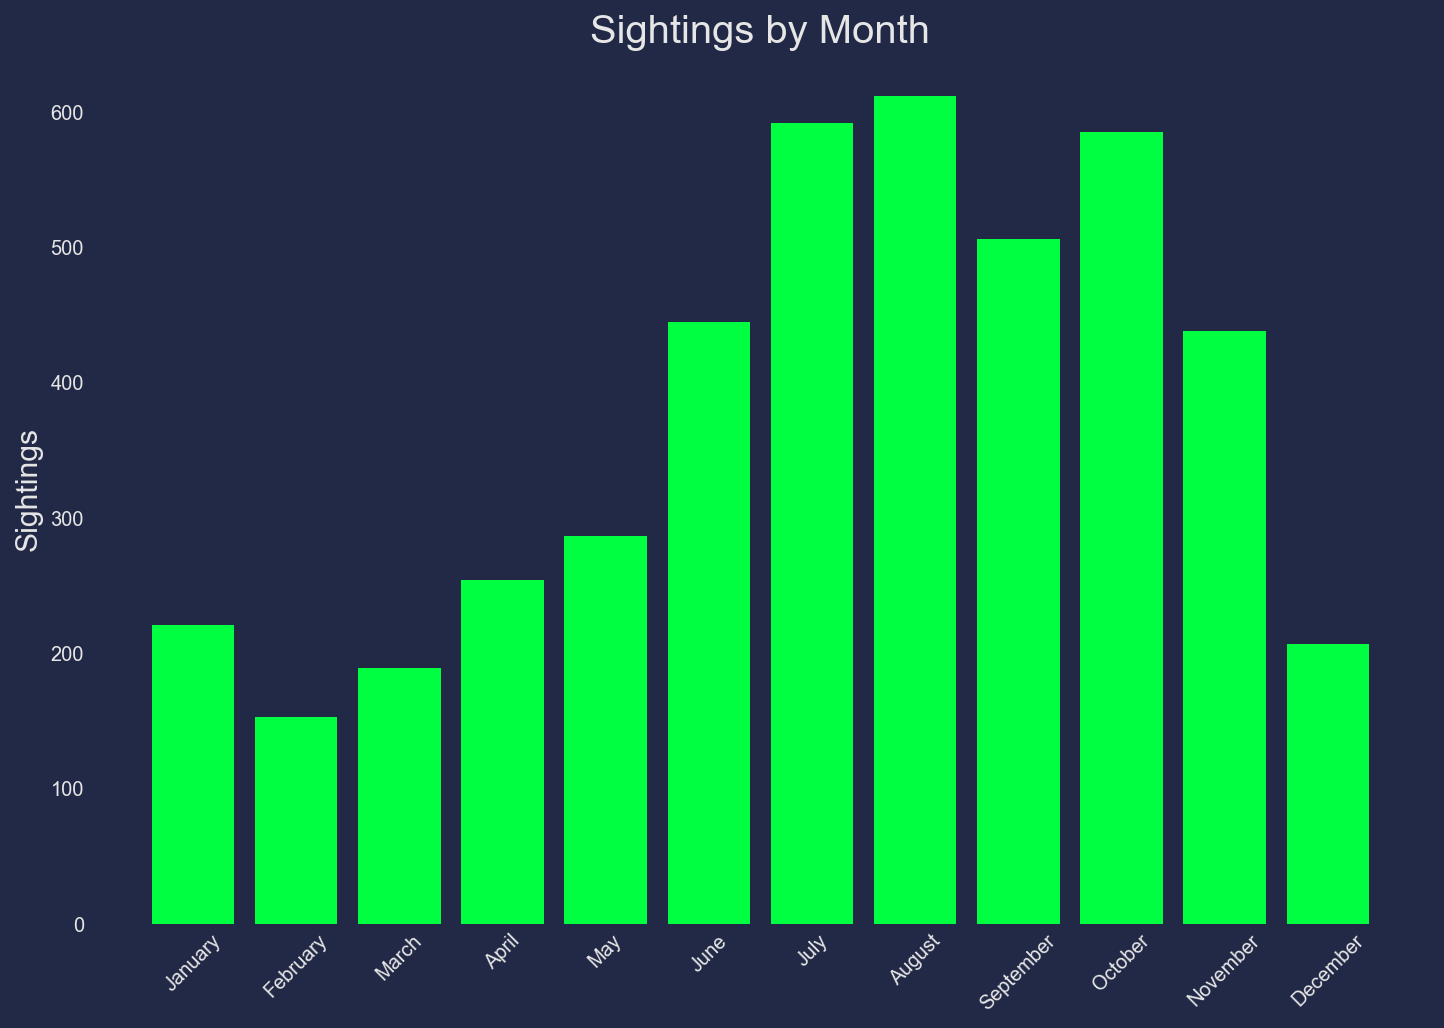

In [17]:
months = df.groupby('MONTH').count()['id']
fig, ax = plt.subplots(figsize=(12,8))
m = ['January','February','March','April','May','June','July','August','September','October','November','December']
ax.bar(m, months[m], color = '#00ff41')
ax.set_title('Sightings by Month', fontsize=20)
ax.set_ylabel('Sightings', fontsize=15)
ax.set_xticklabels(m, rotation=45)
ax.grid(False)
fig.savefig('images/month_bar_er.png')

In [8]:
def tryconvert(x):
    try:
        x = int(str(x[:4]))
    except:
        x = np.nan
    if x > 1000:
        return x
    else:
        return np.nan

df['YEAR'] = df['YEAR'].apply(lambda x: tryconvert(x))

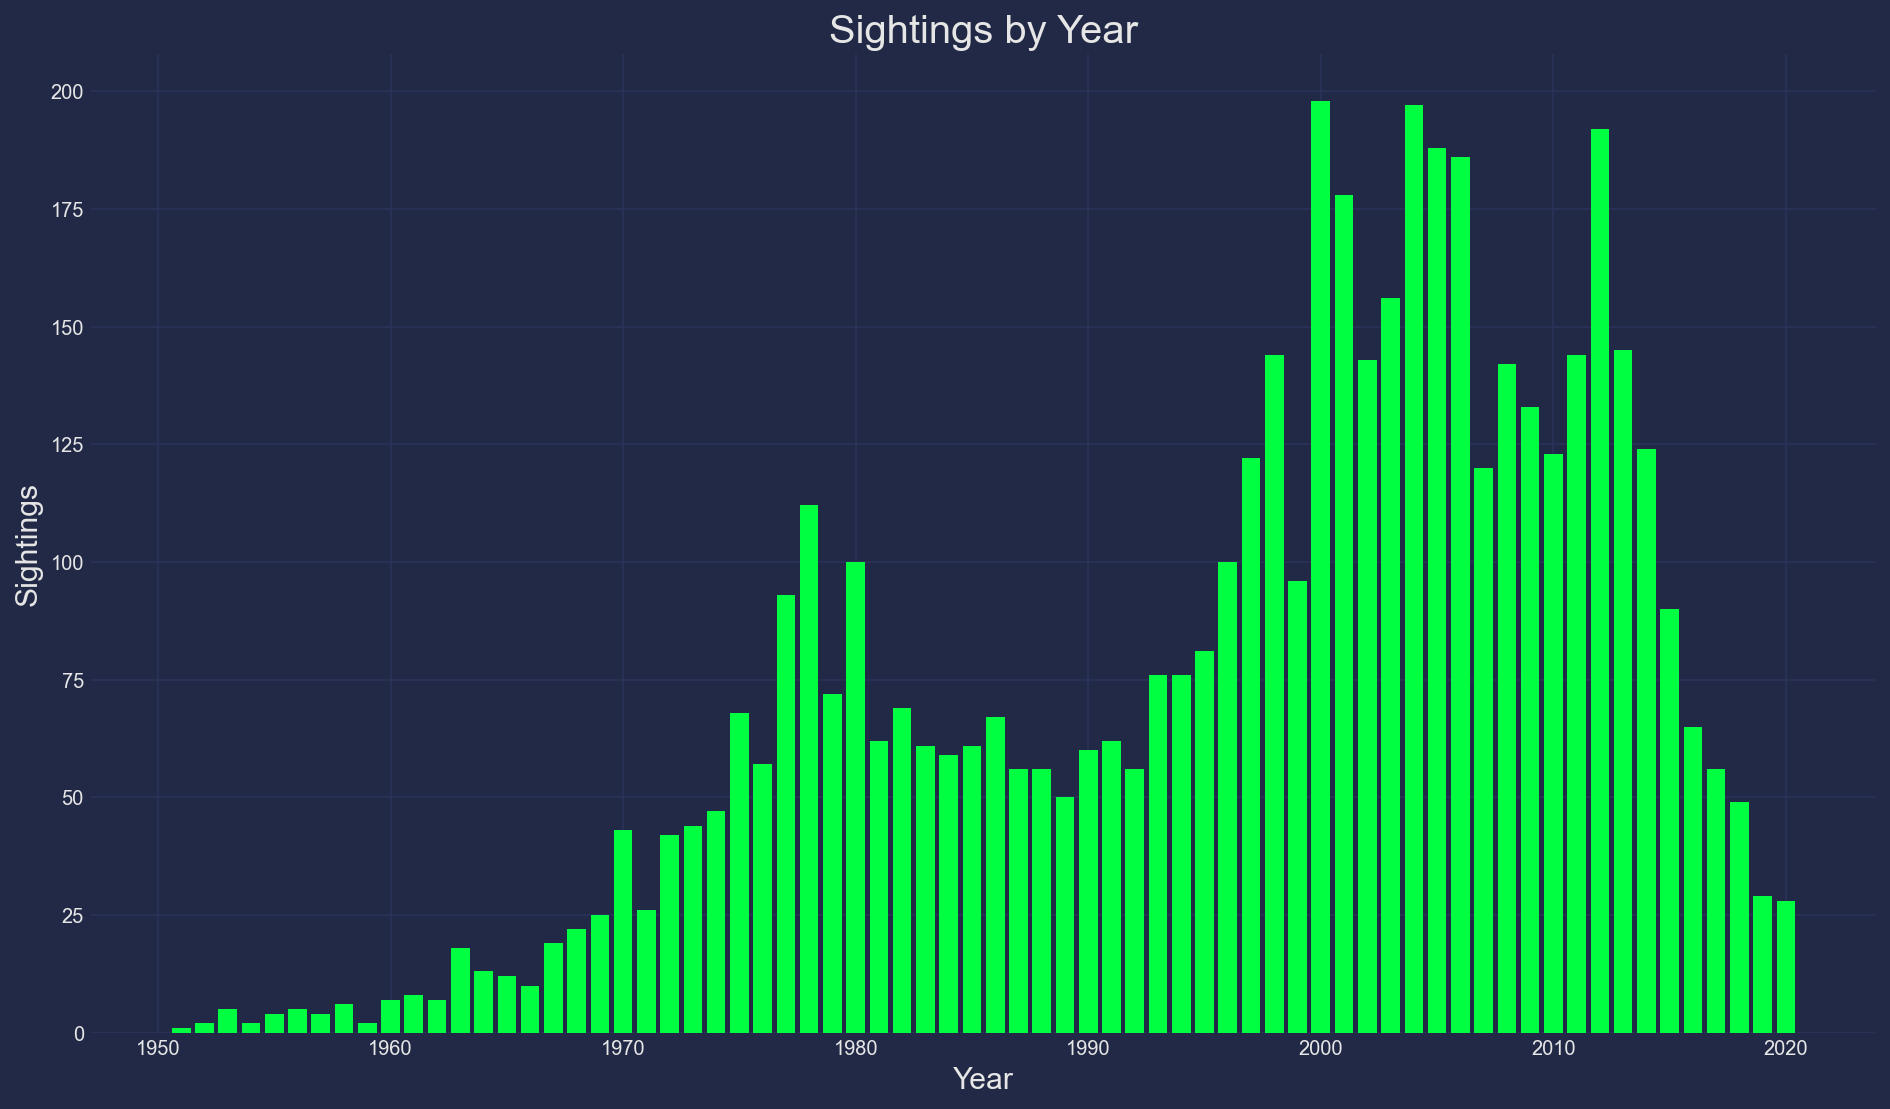

In [15]:
year = df.groupby('YEAR').count()['id']
year = year[year.index > 1950]
fig, ax = plt.subplots(figsize=(16,9))
ax.bar(year.index, year.values, color = '#00ff41')
ax.set_title('Sightings by Year', fontsize=20)
ax.set_ylabel('Sightings', fontsize=15)
ax.set_xlabel('Year', fontsize=15)
# fig.savefig('../images/year_bar_er.png')
plt.show()

## NLP

In [6]:
observed_df = df.loc[df['OBSERVED'].notnull()]

In [7]:
cv = CountVectorizer()
cv_fit = cv.fit_transform(observed_df['OBSERVED'])